# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [85]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
# esmr.remap_csv                = '../temporary/ERA5_Medicine_Hat_remapping.csv'

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 0.0.3 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
remap file is provided; EASYMORE will use this file and skip calculation of remapping
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped NeCDF file
EASYMORE case exists in the remap file
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude varibales has dimensions of:
['longitude']
EASYMORE detects that the latitude varibales has dimensions of:
['latitude']
------R

--------------

# Visualization of the source and the results

258.5163269042969 242.3166961669922


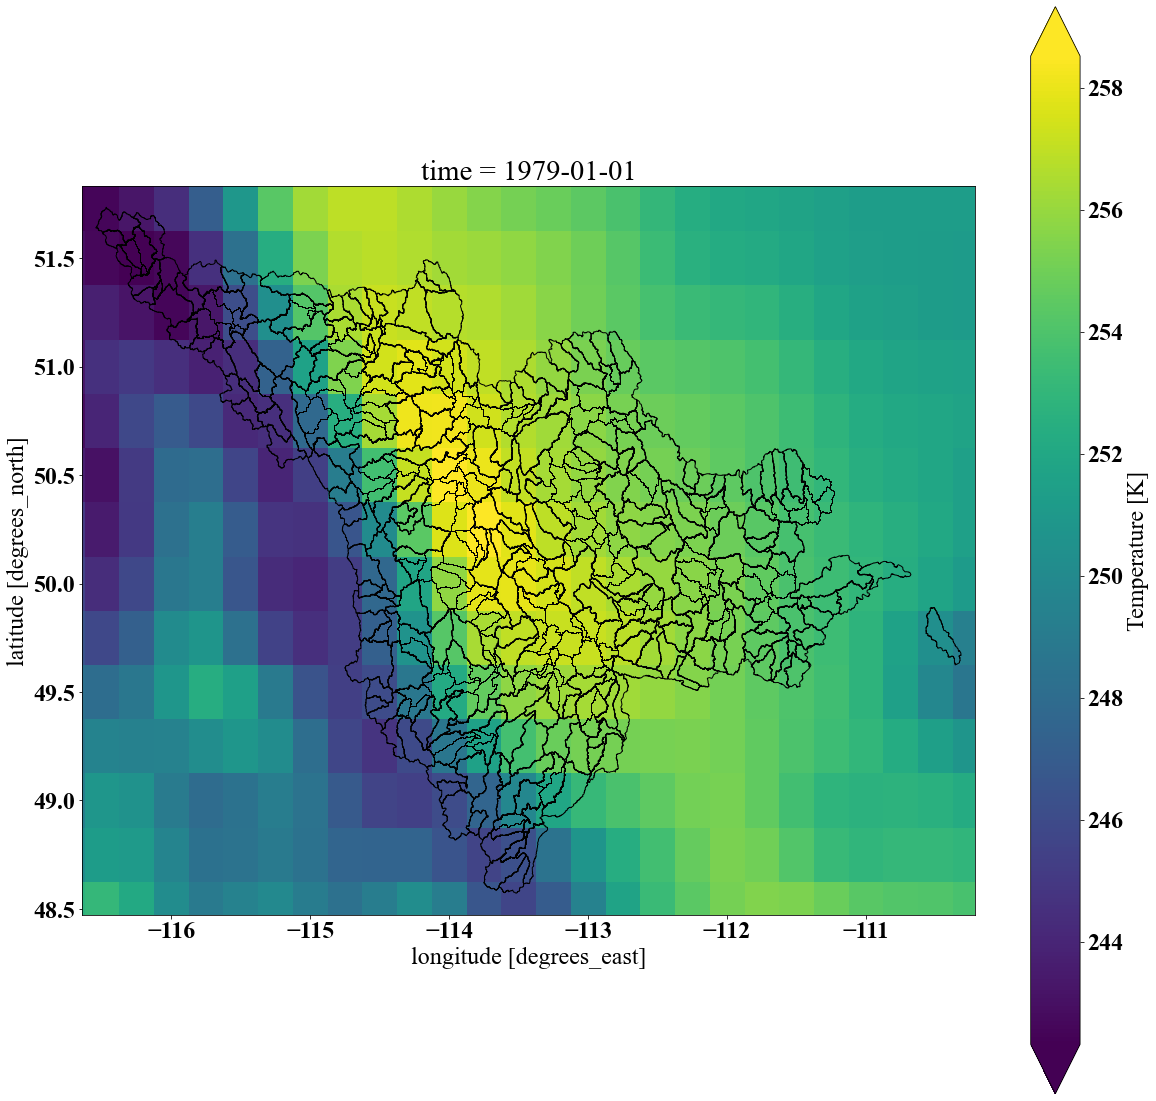

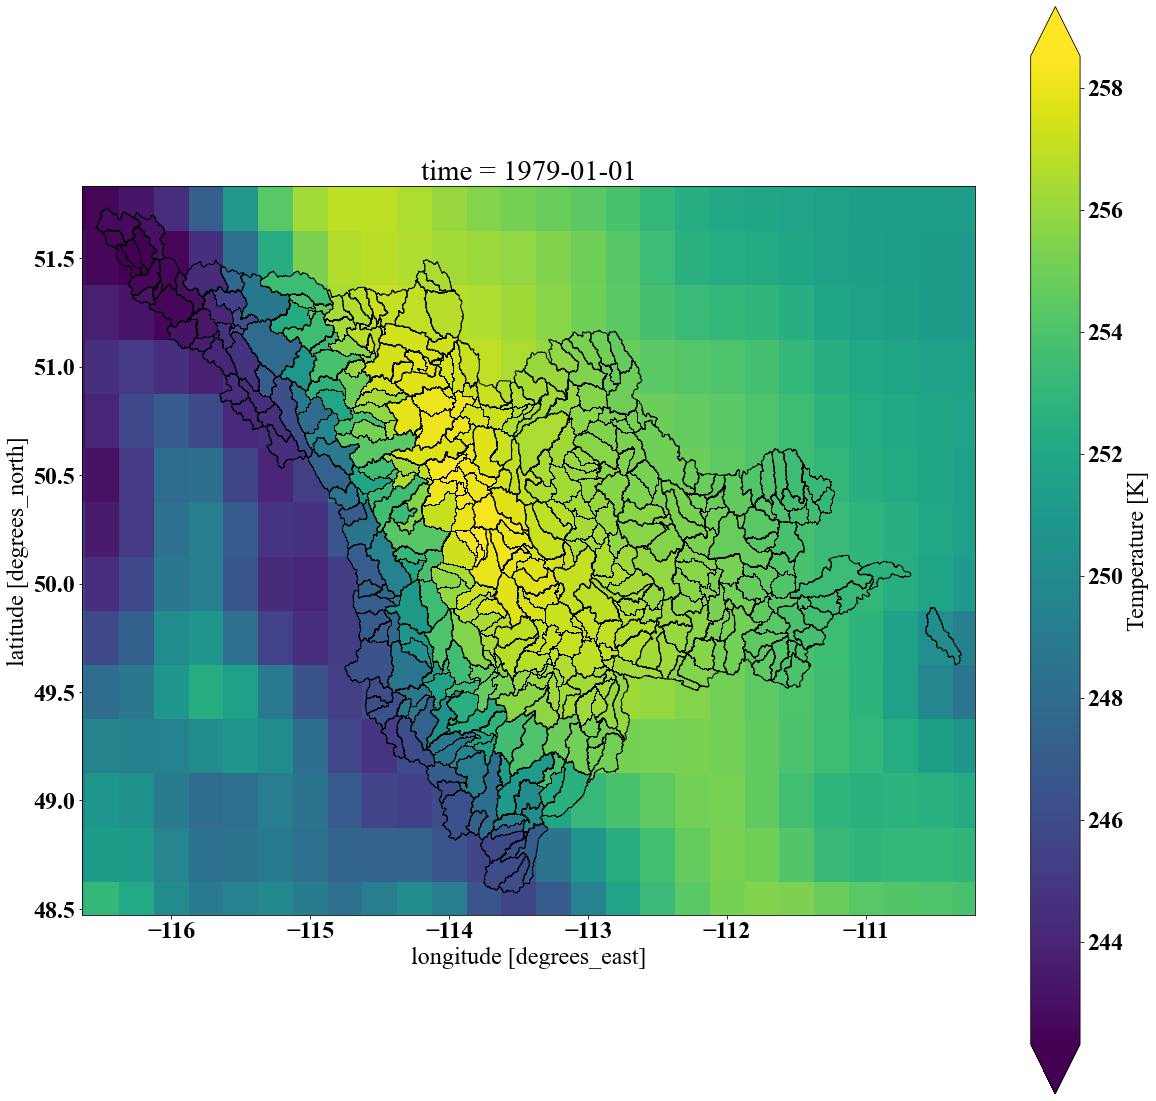

In [91]:
# load the packages
import xarray as xr
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib
import os
import numpy as np
from datetime import datetime
import sys
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)


# varibales to visualize
source_file_name                = '../data/Source_nc_ERA5/ERA5_NA_19790101.nc'
source_file_dimension_lon       = "longitude"
source_file_dimension_lat       = "latitude"
remapped_file_name              = '../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc'
varibale_name_in_source_file    = 'airtemp'
varibale_name_in_remapped_file  = 'temperature'
variable_time_in_source_file    = 'time'
variable_time_in_remapped_file  = 'time'
shp_target_name                 = '../temporary/ERA5_Medicine_Hat_target_shapefile.shp'
shp_target_name                 = esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp'
time_step_of_viz                = '1990-01-01 00:00:00' # it should be in form of 1990-02-01 00:00:00 
#shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
location_save_fig               = '../fig/'
cmap                            = 'viridis'
margin                          = 0.1 #degree
linewidth                       = 1
add_colorbar                    = True
target_shp_ID                   = 'ID_t'
remapped_var_id                 = 'ID'

# create the fig folder is not existed
if not os.path.isdir(location_save_fig):
    os.mkdir(location_save_fig)

# get the time step in the source netcdf file
ds_source = xr.open_dataset(source_file_name) # source
ds_remapped = xr.open_dataset(remapped_file_name) # the remap of above
# check if the times are identical in source and remapped
if not ds_source[variable_time_in_source_file].equals(ds_remapped[variable_time_in_remapped_file]):
    sys.exit('The source and remapped files seems to have different time; make sure '+\
             'the remapped files is from the same source file.')
# get the step for the remapped
date = pd.DatetimeIndex(ds_source[variable_time_in_source_file].dt.strftime('%Y-%m-%d %H:%M:%S'))
df = pd.DataFrame(np.arange(len(date)),
                  columns=["step"],
                  index=date)
df = df.iloc[df.index.get_loc(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S'),method='nearest')]
step = df['step'].item()

# load the data and get the max and min values of remppaed file for the taarget variable
max_value = ds_remapped[varibale_name_in_remapped_file][step].max().item() # get the max of remapped
min_value = ds_remapped[varibale_name_in_remapped_file][step].min().item() # get the min of remapped


#
shp_target = gpd.read_file(shp_target_name) # load the target shapefile
min_lon, min_lat, max_lon, max_lat = shp_target.total_bounds


# first figure the source
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = linewidth, ax = ax)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test1.pdf')


# second figure remapped
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)

# dataframe
df = pd.DataFrame()
df ['ID'] = ds_remapped[remapped_var_id][:]
df ['value'] = ds_remapped[varibale_name_in_remapped_file][step]
df = df.sort_values(by=['ID'])
df = df.reset_index(drop=True)

# shapefile
shp_target = shp_target[shp_target[target_shp_ID].isin(df[remapped_var_id])]
shp_target = shp_target.sort_values(by=[target_shp_ID])
shp_target = shp_target.reset_index(drop=True)

#
shp_target ['value'] = df ['value']
shp_target.plot(column= 'value',
                edgecolor='k',
                linewidth = linewidth,
                ax = ax,
                vmin=min_value,
                vmax=max_value)#, legend=True)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test2.pdf')
